In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('BostonHousing.csv')

In [14]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
import numpy as np

# Check for missing values in the NumPy array
missing_values = np.isnan(data).sum()

print("Number of missing values:", missing_values)


Number of missing values: 0


In [22]:
df.dropna(inplace=True)

In [24]:
x=df.drop('medv',axis=1)

In [26]:
y=df['medv']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [29]:
print("shape of scaled x train:",x_train.shape)
print("shape of scaled x test:",x_test.shape)

shape of scaled x train: (400, 13)
shape of scaled x test: (101, 13)


In [30]:
x_train[0]

array([ 0.95328176, -0.49412608,  1.02927934, -0.2847474 ,  1.59894515,
       -0.66614808,  0.97746801, -0.89249388,  1.64275719,  1.52575738,
        0.78797363, -1.2664648 ,  1.54750603])

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import *

def house_price_prediction():
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(x_train[0].shape)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss='mse', metrics=['mse'])
    return model

In [32]:
model= house_price_prediction()
history = model.fit(x=x_train,y=y_train,batch_size=1,verbose=1,epochs=100,validation_data=(x_test,y_test))

C:\Users\Sanvidha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 232.6293 - mse: 232.6293 - val_loss: 24.1842 - val_mse: 24.1842
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.7072 - mse: 22.7072 - val_loss: 24.0502 - val_mse: 24.0502
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6242 - mse: 12.6242 - val_loss: 12.8521 - val_mse: 12.8521
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.5985 - mse: 16.5985 - val_loss: 20.0838 - val_mse: 20.0838
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.5073 - mse: 13.5073 - val_loss: 16.3996 - val_mse: 16.3996
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.1014 - mse: 12.1014 - val_loss: 12.9938 - val_mse: 12.9938
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.8759 - mse: 9.8759 - val_loss: 29.5796 - val_mse: 29.5796
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8402 - mse: 13.8402 - val_loss: 12.2197 - val_mse: 12.2197
Epoch 9/100
400/

In [34]:
import numpy as np

test_input = np.array([[0.00154995, 0.0, 0.28962963, 0.0, 0.27777778, 0.56936665, 0.70442842, 0.15699879, 0.17391304, 0.3759542, 0.88297872, 0.99665297, 0.16851064]])
print("actual output:", 24.0)
print("predicted output:", model.predict(test_input))


actual output: 24.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
predicted output: [[11.142233]]


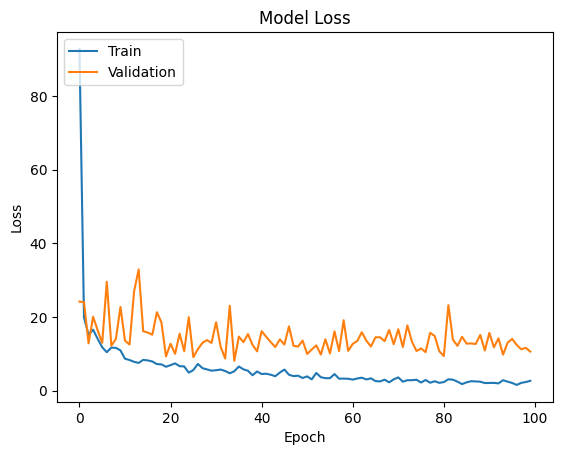

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6659 - mse: 10.6659  
Mean squared error on test data:  10.613628387451172
Mean absolute error on test data:  10.613628387451172
